# MP1: CS 498 DSG (Spring 2020)
##### TEAM: Mohit Jain, Meghna Shrivastava, Tafseer Khan
##### netIds: mohitj2, meghna3, tafseer2

# Task 0 – Getting to know the analysis environment
## Question 1- Import csv data into jupyter notebook

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np  
import datetime
from scipy import stats as st
from statsmodels.stats import weightstats as stests

In [2]:
disf=pd.read_csv('mp1_av_disengagements.csv')

In [3]:
milesf=pd.read_csv('mp1_av_totalmiles.csv')

In [4]:
disf.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [5]:
milesf.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30


##  Question 2. Summarize the following information
### a. Total number of AV disengagements over the entire duration of available data

In [6]:
sum(milesf['total number of disengagements'])

1024

### b. Number of unique months that have recorded AV disengagements

In [7]:
milesf.Month.unique()
len(milesf.Month.unique())

15

In [8]:
#milesf['Only_Month'] = milesf['Month'].apply(lambda x:x.split('-')[1])

In [9]:
#milesf.head()

In [10]:
#milesf.Only_Month.unique()

In [11]:
disf.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


### c. List of unique locations of AV disengagements

In [12]:
disf.Location.unique()

array(['urban-street', 'highway'], dtype=object)

### d. Number of unique causes for AV disengagements

In [13]:
disf.Cause.nunique()

10

### e. Which columns in the datasets (if any) have missing values? How many missing values do these column(s) have? (NAs (not valid entries) commonly occur in real world datasets…)

In [14]:
null_columns=disf.columns[disf.isnull().any()] #Check for null values in dataset
disf[null_columns].isnull().sum()      

ReactionTime    532
dtype: int64

In [15]:
disf.columns[disf.isnull().any()]

Index(['ReactionTime'], dtype='object')

## Question 3: Plot a pie chart for the causes of AV disengagement. Based on the pie-chart, list the top 2 leading causes of disengagement?

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


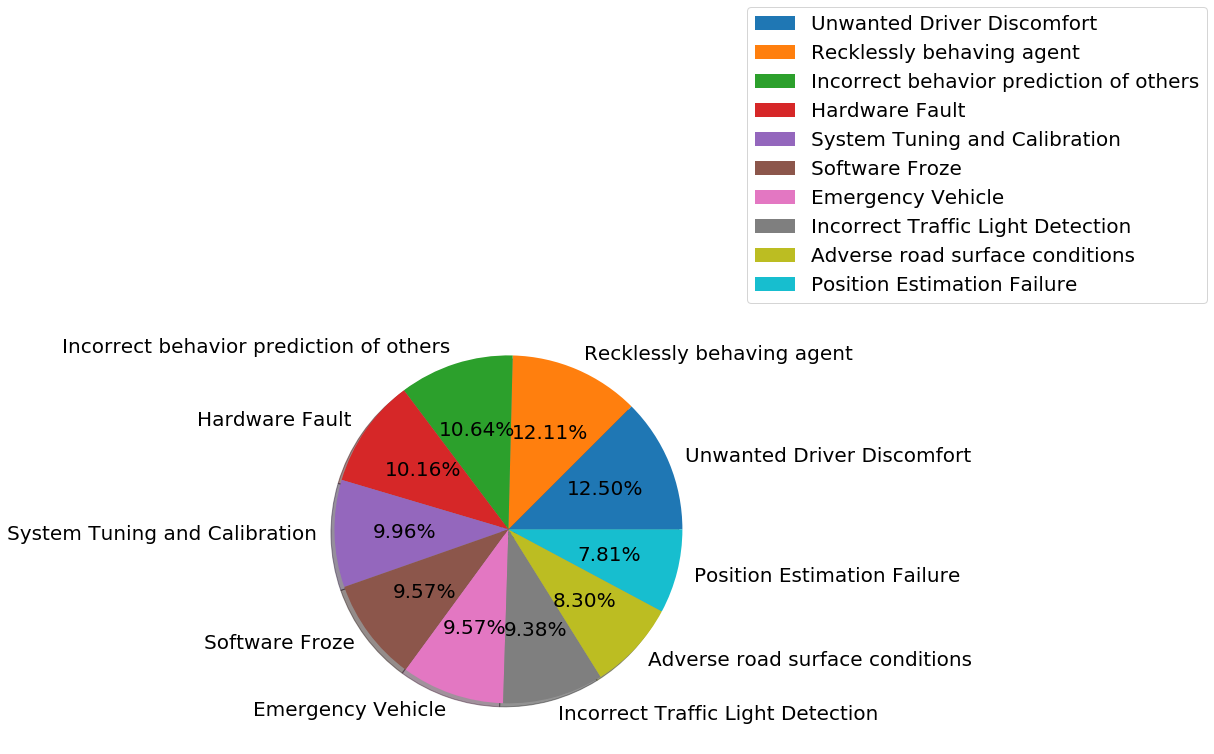

In [16]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0
causes = disf['Cause'].value_counts()

patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%1.2f%%', shadow=True)
plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(1.025,1.725),loc="upper left")
#plt.axis('equal',fontsize=40)
plt.show()

#### According to the pie chart the top 2 leading causes of disengagement are Unwanted Driver Discomfort & Recklessly behaving agent

In [17]:
causes = disf['Cause'].value_counts() #verifying the plot 
causes

Unwanted Driver Discomfort                 128
Recklessly behaving agent                  124
Incorrect behavior prediction of others    109
Hardware Fault                             104
System Tuning and Calibration              102
Software Froze                              98
Emergency Vehicle                           98
Incorrect Traffic Light Detection           96
Adverse road surface conditions             85
Position Estimation Failure                 80
Name: Cause, dtype: int64

## Question 4. Visualize the trend of disengagement/mile over time with monthly granularity. How would you describe the trend? Are AV’s maturing over time?

In [18]:
dissmile=milesf['total number of disengagements']/milesf['miles driven in autonomous mode']

In [19]:
dissmile

0     0.010459
1     0.009511
2     0.008903
3     0.003824
4     0.002639
5     0.000854
6     0.001756
7     0.002255
8     0.000894
9     0.003020
10    0.001982
11    0.000628
12    0.001184
13    0.000361
14    0.000508
15    0.000422
16    0.001117
dtype: float64

In [20]:
milesf.head(30)

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30
5,15-Feb,WDD2221851A001072,18745,16,8,8
6,15-Mar,WDD2221851A001072,22204,39,31,8
7,15-Apr,WDD2221851A001072,31927,72,51,21
8,15-May,WDD2221851A001072,38017,34,11,23
9,15-Jun,WDD2221851A001072,42047,127,58,69


In [21]:
milesf['diss/miles'] = milesf['total number of disengagements']/milesf['miles driven in autonomous mode']

In [22]:
milesf.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements,diss/miles
0,14-Sep,WDD2221851A001072,4207,44,24,20,0.010459
1,14-Oct,WDD2221851A001072,23971,228,100,128,0.009511
2,14-Nov,WDD2221851A001072,15837,141,66,75,0.008903
3,14-Dec,WDD2221851A001072,9413,36,15,21,0.003824
4,15-Jan,WDD2221851A001072,18192,48,18,30,0.002639


In [23]:
milesf = milesf.sort_values(by="Month")
milesf.head(50)


,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements,diss/miles
3,14-Dec,WDD2221851A001072,9413,36,15,21,0.003824
16,14-Nov,WDD2221851A000495,42987,48,19,29,0.001117
2,14-Nov,WDD2221851A001072,15837,141,66,75,0.008903
1,14-Oct,WDD2221851A001072,23971,228,100,128,0.009511
15,14-Oct,WDD2221851A000495,37910,16,11,5,0.000422
0,14-Sep,WDD2221851A001072,4207,44,24,20,0.010459
7,15-Apr,WDD2221851A001072,31927,72,51,21,0.002255
11,15-Aug,WDD2221851A001072,38220,24,13,11,0.000628
5,15-Feb,WDD2221851A001072,18745,16,8,8,0.000854
4,15-Jan,WDD2221851A001072,18192,48,18,30,0.002639


In [24]:
milesf['realmonth']=pd.to_datetime(milesf['Month'],format='%y-%b')

In [25]:
milesf.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements,diss/miles,realmonth
3,14-Dec,WDD2221851A001072,9413,36,15,21,0.003824,2014-12-01
16,14-Nov,WDD2221851A000495,42987,48,19,29,0.001117,2014-11-01
2,14-Nov,WDD2221851A001072,15837,141,66,75,0.008903,2014-11-01
1,14-Oct,WDD2221851A001072,23971,228,100,128,0.009511,2014-10-01
15,14-Oct,WDD2221851A000495,37910,16,11,5,0.000422,2014-10-01


<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

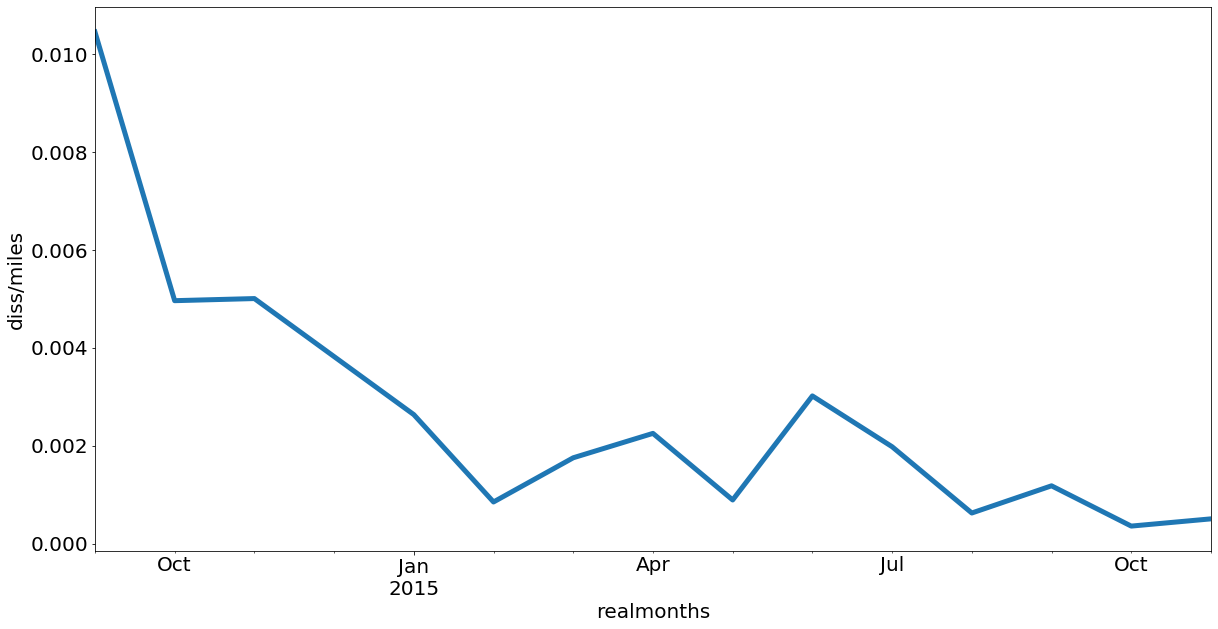

In [26]:
# task 0 question 4
milesf.groupby('realmonth')['diss/miles'].mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('realmonths',fontsize=20);
plt.ylabel('diss/miles',fontsize=20)
plt.title

                   The disengagemnts are decreasing with time which implies that AV are imporving with time.

# Task 1- Basic Analysis of AV Disengagements

## Quesiton 1- What do the following distributions signify about samples drawn from it?

### a. Gaussian distribution

PDF: ${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

Normal distributions are mostly used in natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples\of a random variable with finite mean and variance is itself a random variable whose distribution tends towards a normal distribution as the number of samples increases. 
This distribution also known as the “Bell Curve”. And because of the following features it is highly appreciated by the data scientists.
1-The mean, median and mode of normal distribution are equal plus it is symmetric around the  mean.
2-The curve is dependent on the mean and standard distribution of their data and it is very dense at the center and less dense at the tails.
3-Appoximately 95% of the area of the curve is within 2 standard deviations of the mean


### b. Exponential Distribution

PDF: $ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$

The exponential distribution occurs naturally when describing the lengths of the inter-arrival times in a homogeneous Poisson process.
The exponential distribution describes the amount of time between occurrences. 
E[X] is given by 1/ λ where λ Exponential Distribution .
Which means that as λ gets larger the less is the time between occurrences.
For Poisson equation, Exponential Distribution  is useful to model the random arrival pattern 


### c. Weibull distribution


$
{\displaystyle f(x;\lambda ,k)={\begin{cases}{\frac {k}{\lambda }}\left({\frac {x}{\lambda }}\right)^{k-1}e^{-(x/\lambda )^{k}}&x\geq 0,\\0&x<0,\end{cases}}}$

It is widely used in life like systems for the data analysis.
It has 2 parameters, 1- Beta as shape parameter and second is N a scale parameter.
If beta is less than 1, the probailty density tends to infinity at time ~zero
If beta is equal to 1 the graph the failure rate is fairly constant.
If beta is greater than 1 the failures rate increases as time increases.


## Question 2 - If the AV suddenly disengages, there may not be enough time for the human to react.It is also possible, that the human is not sufficiently attentive while in the AV becauseof reliance on the technology. To understand the human alertness level, we measure the reaction time of the human driver in the field. Plot the probability distribution of reaction times. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the fit distribution signify?

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


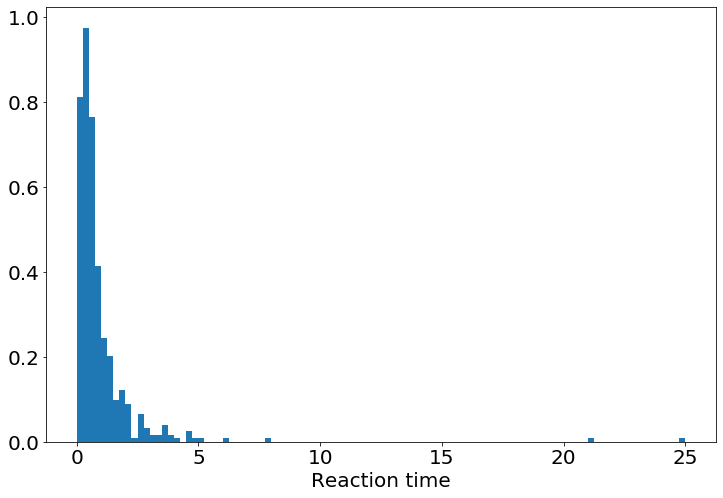

In [27]:
x = disf['ReactionTime']
plt.hist(x, normed=True, bins=100)
plt.xlabel('Reaction time');

According to the plot it can be inferred that the distribution follows weibul distribution which shows that the probability of the reaction time being high for human beings is very low.

## Question 3 -  Compute the average reaction time

### a. For the entire duration of the dataset

In [28]:
avg_reaction_time = disf['ReactionTime'].mean()
print(avg_reaction_time)

0.9297703252032521


### b. For the entire duration of the dataset differentiated by the location of disengagement

In [29]:
avg_reaction_time = disf.groupby(disf['Location']).mean()
print(avg_reaction_time)

              ReactionTime
Location                  
highway            1.48000
urban-street       0.92865


## Question 4 - It is known that the mean reaction time for humans in non-AV cars is 1.09 seconds. Is the mean reaction time for humans in AV cars different from non-AV cars? Perform a hypothesis testing at a 0.05 significance level.

In [30]:
reaction_time = list(disf[disf['ReactionTime'].notnull()]['ReactionTime'])
one_sample = st.ttest_1samp(reaction_time, 1.09)
print("t-statistic = %.3f \np-value = %.3f." % one_sample)
if one_sample[1] < 0.05:
    print("Reaction time for humans in AV cars is different from non-AV cars.")
else:
    print("Reaction time for humans in AV cars is not different from non-AV cars.")

t-statistic = -2.099 
p-value = 0.036.
Reaction time for humans in AV cars is different from non-AV cars.


## Question 5 - Plot the probability distribution of disengagements/mile with monthly granularity. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the distribution that fits signify?

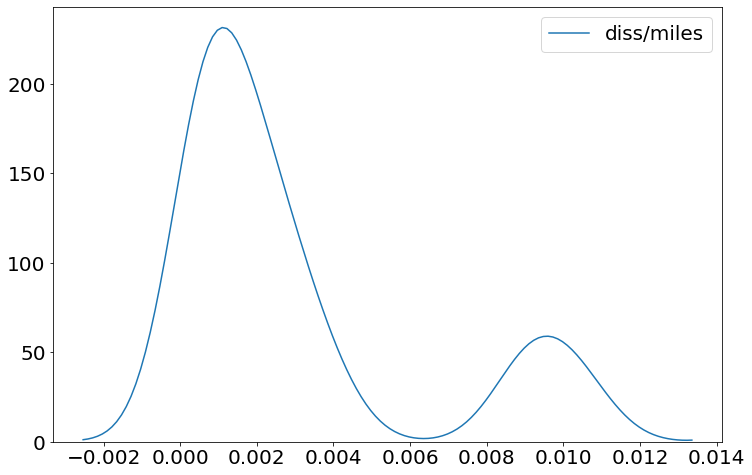

In [31]:
ax = sns.kdeplot(milesf['diss/miles'])

The distribution mostly fits an exponential distribution. The disengagement per mile is decreasing continuously expect for a few values which are rising. These values can be considered as outliers. We will be able to have a much better idea of the fit with a larger dataset.

# Task 2 - Probabilistic Analysis of AV Disengagement
## Question 1

### a. The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a bernoulli distribution.

### b. Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day.

In [32]:
total_diseng = milesf['total number of disengagements'].sum()
miles_drives= milesf['miles driven in autonomous mode'].sum()
prob_dis= total_diseng/miles_drives
print("P(DPM):",prob_dis)
prob_cloudy = 1-0.72
cloudy = disf['Weather']=='cloudy'
prob_dpm_cloudy = (sum(cloudy) / len(disf)) * prob_dis / prob_cloudy
print("P(DPM|cloudy):",prob_dpm_cloudy)

P(DPM): 0.002026803687040926
P(DPM|cloudy): 0.00590255677552725


### c.  Based on the above assumptions, calculate the probability of disengagement per mile on a clear day.

In [33]:
clear= ~cloudy
prob_dpm_clear =(sum(clear)/len(disf))*prob_dis/0.72
print("P(DPM|clear): ",prob_dpm_clear)
prob_clear = 0.72

P(DPM|clear):  0.0005195663748517999


### d. Similarly, calculate the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day.

In [34]:
auto = disf['TypeOfTrigger']=='automatic'
cloudyauto=(cloudy & auto)
likelihood_cloudy=(sum(cloudyauto)/len(disf))
prob_dpm_cloudy_auto=likelihood_cloudy*prob_dis/prob_cloudy
clearauto=(clear & auto)
likelihood_clear=(sum(clearauto) / len(disf))
prob_dpm_clear_auto=likelihood_clear*prob_dis/prob_clear
print("P(Automatic,DPM|Cloudy):",(prob_dpm_cloudy_auto))
print("P(Automatic,DPM|Clear):",(prob_dpm_clear_auto))

P(Automatic,DPM|Cloudy): 0.0028063653172267287
P(Automatic,DPM|Clear): 0.00026390673008345393


### e. How likely is it that in 12000 miles, there are 150 or more disengagements under cloudy conditions? [Hint: Think of an appropriate approximation that makes the computation feasible/easier.]

In [35]:
prob = 1-st.norm(10000*prob_dpm_cloudy, np.sqrt(10000*prob_dpm_cloudy*(1-prob_dpm_cloudy))).cdf(150)
print('Probability of 150 or more disengagements in 12000 miles under cloudy conditions:',prob)

Probability of 150 or more disengagements in 12000 miles under cloudy conditions: 0.0


## Question 2

## Question 3 
### At the 0.05 significance level, test the following hypothesis: The AV has more disengagements (automatic and manual) on cloudy days than clear days. Based on the result of the hypothesis test, what can you conclude about the impact of weather conditions on AV safety?

$$\eqalign{& {H_o}:{\text{ Number of disengagements on cloudy days}  \leq \text{ Number of disengagements on clear days}}  \cr 
  & {H_a}:{\text{Number of disengagement on cloudy days} >  \text{Number of disengagement on clear days}} \cr} $$

In [36]:
from statsmodels.stats.proportion import proportions_ztest
count1 = 0
count2 = 0
i=0
while i<len(disf):
    if disf.Weather.iloc[i]=="cloudy":
        count1 = count1+1
    if disf.Weather.iloc[i]=="clear":
        count2 = count2+1
    i=i+1
print("Count of cloudy ",count1)
print("Count of clear ",count2)
counts=[count1,count2]
total_dis= milesf['total number of disengagements'].sum()
total_miles = milesf['miles driven in autonomous mode'].sum()
cloudy_miles = prob_cloudy*total_miles
clear_miles = prob_clear*total_miles
stat, pval = proportions_ztest(counts, [cloudy_miles, clear_miles],alternative='larger')
print('p-value: {0}'.format(pval))

Count of cloudy  835
Count of clear  189
p-value: 0.0


## Question 4
### What’s the conditional probability that the reaction time is: (Hint, there might be multiple conditions to consider.) 
### a. Greater than 0.6s given that the weather was cloudy? Reaction time is measured only in cases where there was an automatic disengagement.

In [37]:
rt=disf['ReactionTime']>0.5
prob_reaction_cloudy = sum(cloudyauto & rt )/sum(cloudyauto)
print("P(Reaction Time > 0.5s | Cloudy):",prob_reaction_cloudy)

P(Reaction Time > 0.5s | Cloudy): 0.5390428211586902


### b. What’s the conditional probability that the reaction time is greater than 0.7s given that the weather was clear?

In [38]:
prob_reaction07_clear = sum(clearauto & (disf['ReactionTime']>0.7))/sum(clearauto)
print("P(Reaction Time > 0.7s | Clear):",prob_reaction07_clear)

P(Reaction Time > 0.7s | Clear): 0.3854166666666667


## Question 5
### A study found that an automatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.5s under cloudy conditions and, (ii) a reaction time greater than 0.7s under clear conditions. Find the probability of an accident per mile involving an AV disengagement.

In [39]:
prob_reaction_clear = sum(clearauto & (disf['ReactionTime']))/sum(clearauto)
prob_reaction = (prob_reaction_clear * prob_clear * prob_dpm_clear_auto) + (prob_reaction_cloudy * (1 - prob_clear) * prob_dpm_cloudy_auto)
print("P(acc/mile):",prob_reaction)

P(acc/mile): 0.0006135831474440304


## Question 6
### The probability of a human driver causing a car accident is 2x10-6 [4]. How do AVs compare to human drivers? Justify your conclusion and explain its consequences.

In [40]:
prob_human = 2e-6
print("P(Accident|Human):",prob_human)
print("P(Accident|AV):",prob_reaction)
if prob_reaction>prob_human:
    print("The probability of a human driver causing car accident is lesser than AVs.")
elif prob_reaction == prob_human:
    print("The probability of a human driver causing car accident is same as AVs.")
else:
    print("The probability of a human driver causing car accident is more than AVs.")

P(Accident|Human): 2e-06
P(Accident|AV): 0.0006135831474440304
The probability of a human driver causing car accident is lesser than AVs.


## Question 7
### The hypothesis test you performed in this task is an example of a parametric test that assumes that the observed data is distributed similarly to some other well-known distribution (such as a normal distribution). However, sometimes, we need to compare two distributions of data that don’t follow any such well-known distributions. Perform a two-sample Kolmogorov-Smirnov test (using the ks_2samp package from Scipy) to compare the following two distributions: (1) distribution of disengagement reaction time when the weather is cloudy and (2) distribution of disengagement reaction time when the weather is clear. What are your null and alternative hypotheses? Assuming a significance level threshold of 0.1, what can you conclude from the test results about the impact of weather conditions on disengagement reaction time?

# Task 3
## Question 1

### Though there are 10 different causes for disengagement, they can be grouped into the following 3 classes – (i) Controller, (ii) Perception System, and (iii) Computer System. The mapping from Disengagement Cause to Class is given in the table below. You will use these 3 classes as the labels in the NB model. Modify your pandas data frame to include a ‘Class’ column.

In [41]:
disf=pd.read_csv('mp1_av_disengagements.csv')
disf.loc[disf['Cause']=='Incorrect behavior prediction of others', 'Class'] = 'Controller'
disf.loc[disf['Cause']=='Recklessly behaving agent', 'Class'] = 'Controller'
disf.loc[disf['Cause']=='Unwanted Driver Discomfort', 'Class'] = 'Controller'
disf.loc[disf['Cause']=='Adverse road surface conditions', 'Class'] = 'Perception System'
disf.loc[disf['Cause']=='Emergency Vehicle', 'Class'] = 'Perception System'
disf.loc[disf['Cause']=='Position Estimation Failure', 'Class'] = 'Perception System'
disf.loc[disf['Cause']=='Incorrect Traffic Light Detection', 'Class'] = 'Perception System'
disf.loc[disf['Cause']=='System Tuning and Calibration', 'Class'] = 'Computer System'
disf.loc[disf['Cause']=='Hardware Fault', 'Class'] = 'Computer System'
disf.loc[disf['Cause']=='Software Froze', 'Class'] = 'Computer System'
print(disf.Class.unique())
features=disf[['Location','Weather','TypeOfTrigger']]
lables = disf.Class
disf.head()

['Perception System' 'Computer System' 'Controller']


,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Perception System
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Perception System
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Perception System
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Perception System
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Perception System


## Question 2
### Split the data randomly into training and testing (80-20 split). Use the fields ‘Location’, ‘Weather’, and ‘TypeOfTrigger’ as features and use ‘Class’ as assigned in the previous question as the label.

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
disf1=disf.copy()
features=disf[['Location','Weather','TypeOfTrigger']]
encoder = preprocessing.LabelEncoder()
disf['Location'] = encoder.fit_transform(disf['Location'])
disf['Weather'] = encoder.fit_transform(disf['Weather'])
disf['TypeOfTrigger'] = encoder.fit_transform(disf['TypeOfTrigger'])
features=disf[['Location','Weather','TypeOfTrigger']]
X_train, X_test, Y_train, Y_test = train_test_split(features, lables, test_size = 0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_predicted = nb.predict(X_test)

## Question 3
### Using the training dataset, create a NB model to identify the cause of disengagement based on the features ‘Location’, ‘Weather’, and ‘TypeOfTrigger’. Show the conditional probability tables from the training dataset.

In [73]:
disf=disf1
rating_probs = disf.groupby('Class').size().div(len(disf))
print("Priors-")
print(rating_probs)


Priors-
Class
Computer System      0.296875
Controller           0.352539
Perception System    0.350586
dtype: float64


In [74]:
# for Type of Trigger
rating_probs1 = disf.groupby('Class').size().div(len(disf))
dataset=disf.groupby(['Class','TypeOfTrigger'], as_index=False)['Class'].size().div(len(disf)).div(rating_probs1, axis=0, level='Class')
dataset

Class              TypeOfTrigger
Computer System    automatic        0.483553
                   manual           0.516447
Controller         automatic        0.132964
                   manual           0.867036
Perception System  automatic        0.830084
                   manual           0.169916
dtype: float64

In [75]:
# for Location
rating_probs1 = disf.groupby('Class').size().div(len(disf))
dataset=disf.groupby(['Class','Location'], as_index=False)['Class'].size().div(len(disf)).div(rating_probs1, axis=0, level='Class')
dataset

Class              Location    
Computer System    highway         0.065789
                   urban-street    0.934211
Controller         urban-street    1.000000
Perception System  urban-street    1.000000
dtype: float64

In [76]:
# for Weather
rating_probs1 = disf.groupby('Class').size().div(len(disf))
dataset=disf.groupby(['Class','Weather'], as_index=False)['Class'].size().div(len(disf)).div(rating_probs1, axis=0, level='Class')
dataset

Class              Weather
Computer System    clear      0.618421
                   cloudy     0.381579
Controller         clear      0.002770
                   cloudy     0.997230
Perception System  cloudy     1.000000
dtype: float64

## Question 4
### Using the model to predict the cause of the disengagement for the test dataset. Compute the accuracy achieved by your model.

In [117]:
acc=accuracy_score(Y_test, y_predicted, normalize=True, sample_weight=None)
print("Accuracy of the model is: ", acc*100)

Accuracy of the model is:  79.02439024390245


## Question 5
### To get a better estimate of the model performance, perform cross-validation. Repeat sub-questions 2, 3 and 4 five times for different splits of training and test data, and report the average accuracy.

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(features, lables, test_size = 0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_predicted = nb.predict(X_test)
first_case=accuracy_score(Y_test, y_predicted, normalize=True, sample_weight=None)
print("Accuracy of the model is: ", first_case*100)
X_train, X_test, Y_train, Y_test = train_test_split(features, lables, test_size = 0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_predicted = nb.predict(X_test)
second_case=accuracy_score(Y_test, y_predicted, normalize=True, sample_weight=None)
print("Accuracy of the model is: ", second_case*100)
X_train, X_test, Y_train, Y_test = train_test_split(features, lables, test_size = 0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_predicted = nb.predict(X_test)
third_case=accuracy_score(Y_test, y_predicted, normalize=True, sample_weight=None)
print("Accuracy of the model is: ", third_case*100)
X_train, X_test, Y_train, Y_test = train_test_split(features, lables, test_size = 0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_predicted = nb.predict(X_test)
fourth_case=accuracy_score(Y_test, y_predicted, normalize=True, sample_weight=None)
print("Accuracy of the model is: ", fourth_case*100)
X_train, X_test, Y_train, Y_test = train_test_split(features, lables, test_size = 0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_predicted = nb.predict(X_test)
fifth_case=accuracy_score(Y_test, y_predicted, normalize=True, sample_weight=None)
print("Accuracy of the model is: ", fifth_case*100)
average_accuracy = (first_case + second_case + third_case + fourth_case + fifth_case)/5.0
print("Average Accuracy of 5 cases is ",average_accuracy*100)



Accuracy of the model is:  50.73170731707317
Accuracy of the model is:  81.46341463414633
Accuracy of the model is:  55.1219512195122
Accuracy of the model is:  55.1219512195122
Accuracy of the model is:  83.41463414634146
Average Accuracy of 5 cases is  65.17073170731706
